In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
mag_s = pd.read_csv('./magazine/final/magazine_s_stickword.csv', encoding = 'utf-8', sep ='|')

In [4]:
mag_s['ADFN'] = mag_s['ADFN'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
mag_s['ADFN'].head()

0    [빨갛, 더블, 코트, 타이츠, 라텍스, 소재, 보디, 슈트, 하이, 부츠, LAU...
1    [클래식, 컬러, 코트, 우영, WOOYOUNGMI, 버건디, 컬러, 파, 가죽, ...
2    [짙, 그레이, 컬러, 데님, 팬츠, LAURENT, ANTHONY, LAURENT...
3    [YSL, 모노그램, 새기, 블랙, 에나멜, 안경, 다리, 둥글, 금테, 안경, L...
4    [컬러, 블록, 트렌치, 코트, LEJE, 컵, 케이크, 프린트, 티셔츠, 마크, ...
Name: ADFN, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./magazine/final/s_ADFN_rank_dropword.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,LAURENT,2302
1,패션,690
2,컬렉션,559
3,브랜드,532
4,디자이너,420
...,...,...
495,정원,30
496,밴드,30
497,남기,30
498,넣,30


In [8]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['LAURENT', '패션', '컬렉션', '브랜드', '디자이너', 'ANTHONY', '쇼', 'HEDI', '드레스', '소재', '스타일', '모델', '여성', '파리', '시즌', '팬츠', '장식', '디자인', '재킷', '하우스', '컬러', '옷', '가죽', '부츠', '그룹', '디렉터', '새롭', '블랙', '아이템', '슈트', '프랑스', '럭셔리', 'CREATIVE', 'COUTURE', '코트', '데님', '로고', '셔츠', '여름', '영감', '슈즈', '봄', '좋', '선글라스', '세계', '캠페인', '실루엣', '영화', '새', '시대']


### top100

In [9]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['LAURENT', '패션', '컬렉션', '브랜드', '디자이너', 'ANTHONY', '쇼', 'HEDI', '드레스', '소재', '스타일', '모델', '여성', '파리', '시즌', '팬츠', '장식', '디자인', '재킷', '하우스', '컬러', '옷', '가죽', '부츠', '그룹', '디렉터', '새롭', '블랙', '아이템', '슈트', '프랑스', '럭셔리', 'CREATIVE', 'COUTURE', '코트', '데님', '로고', '셔츠', '여름', '영감', '슈즈', '봄', '좋', '선글라스', '세계', '캠페인', '실루엣', '영화', '새', '시대', '어깨', '전시', '사랑', '톱', '시절', '라인', '수트', '미니', '패션계', '뷰티', '남성복', '즐기', '하이', '스커트', '완성', '트렌드', '시크', '패턴', '의상', '자리', '열리', '숄더', '분위기', '클래식', '무드', '파워', '패션쇼', '화이트', '완벽', '작품', '이미지', '백', '다르', '뉴욕', '프린트', '선택', '위크', '스타', '처음', '데뷔', '가을', 'ALEXANDER', '드러내', '벨', '배우', '작업', '찾', '트', '멀', '살']


In [10]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500)

500
['LAURENT', '패션', '컬렉션', '브랜드', '디자이너', 'ANTHONY', '쇼', 'HEDI', '드레스', '소재', '스타일', '모델', '여성', '파리', '시즌', '팬츠', '장식', '디자인', '재킷', '하우스', '컬러', '옷', '가죽', '부츠', '그룹', '디렉터', '새롭', '블랙', '아이템', '슈트', '프랑스', '럭셔리', 'CREATIVE', 'COUTURE', '코트', '데님', '로고', '셔츠', '여름', '영감', '슈즈', '봄', '좋', '선글라스', '세계', '캠페인', '실루엣', '영화', '새', '시대', '어깨', '전시', '사랑', '톱', '시절', '라인', '수트', '미니', '패션계', '뷰티', '남성복', '즐기', '하이', '스커트', '완성', '트렌드', '시크', '패턴', '의상', '자리', '열리', '숄더', '분위기', '클래식', '무드', '파워', '패션쇼', '화이트', '완벽', '작품', '이미지', '백', '다르', '뉴욕', '프린트', '선택', '위크', '스타', '처음', '데뷔', '가을', 'ALEXANDER', '드러내', '벨', '배우', '작업', '찾', '트', '멀', '살', '피', '신', '남성', '자유', '유명', '따르', '비통', '매장', '반짝이', '얻', 'W', '원', '맥', '마크', '눈', '스', '매력', '골드', '파', '끌', '스키', '루', '마지막', '블', 'MARRAKECH', '매출', '백은', 'YSL', '방식', '좋아하', '존재', '듣', '무대', '점', '문화', '만나', '까', '예정', '스타일링', '우', '약', '활동', '피에르', '당시', '런', '현재', '해지', '젊', '공개', '성장', '크리스', '티셔츠', '느낌', '베스트', '스트리트', '빈티지', '발', '남자', '여

### top50만 남기기

In [15]:
len(mag_s)

1274

In [16]:
top50_word = []
for i in range(len(mag_s)):
    w=[]
    for word in mag_s.loc[i, 'ADFN']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [17]:
top100_word = []
for i in range(len(mag_s)):
    w=[]
    for word in mag_s.loc[i, 'ADFN']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [18]:
top500_word = []
for i in range(len(mag_s)):
    w=[]
    for word in mag_s.loc[i, 'ADFN']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

In [19]:
top500

,word,count
0,LAURENT,2302
1,패션,690
2,컬렉션,559
3,브랜드,532
4,디자이너,420
...,...,...
495,정원,30
496,밴드,30
497,남기,30
498,넣,30


### item 남기기

In [20]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [21]:
# item_word = []
# for i in range(len(mag_ch)):
#     w=[]
#     for word in mag_ch.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [22]:
# top100_not_item_word = []
# for i in range(len(mag_ch)):
#     w=[]
#     for word in mag_ch.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [23]:
# len(top100_not_item_word)

In [24]:
# top100_not_item_word[1]

### top100이면서 common이 아닌 것

In [25]:
common = ['브랜드',
 '쇼',
 '모델',
 '장식',
 '드레스',
 '파리',
 '여성',
 '스타일',
 '컬러',
 '디자이너',
 '블랙',
 '재킷',
 '아이템',
 '옷',
 '디렉터',
 '팬츠']


In [26]:
# top100_not_common_word = []
# for i in range(len(mag_ch)):
#     w=[]
#     for word in mag_ch.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in common:
#                 w.append(word)
#     top100_not_common_word.append(w)

### top100이면서 common/item이 아닌 것

In [27]:
# top100_not_common_item_word = []
# for i in range(len(mag_ch)):
#     w=[]
#     for word in mag_ch.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in common:
#                 if word not in item:
#                     w.append(word)
#     top100_not_common_item_word.append(w)

In [28]:
len(top50_word)

1274

In [29]:
top50_word[:5]

[['코트', '소재', '슈트', '부츠', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY'],
 ['컬러',
  '코트',
  '컬러',
  '가죽',
  '셔츠',
  '컬러',
  '로고',
  'LAURENT',
  'ANTHONY',
  'LAURENT',
  'ANTHONY',
  '코트',
  '가죽',
  '소재',
  '재킷',
  '팬츠',
  'LAURENT',
  'ANTHONY',
  '로고',
  '장식'],
 ['컬러', '데님', '팬츠', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY'],
 ['블랙', 'LAURENT', 'LAURENT'],
 ['컬러',
  '코트',
  '데님',
  '팬츠',
  '슈즈',
  '선글라스',
  'LAURENT',
  'ANTHONY',
  'LAURENT',
  'ANTHONY']]

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [30]:
# 어프라이어리(Apriori)
from apyori import apriori

In [31]:
top50_word[0]

['코트', '소재', '슈트', '부츠', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY']

In [32]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.07))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
65,"(패션, LAURENT)",0.277865,"[((), (패션, LAURENT), 0.2778649921507064, 1.0),...",2
62,"(컬렉션, LAURENT)",0.233909,"[((), (컬렉션, LAURENT), 0.23390894819466249, 1.0...",2
47,"(LAURENT, 브랜드)",0.208791,"[((), (LAURENT, 브랜드), 0.2087912087912088, 1.0)...",2
43,"(LAURENT, 디자이너)",0.193878,"[((), (LAURENT, 디자이너), 0.19387755102040816, 1....",2
35,"(LAURENT, ANTHONY)",0.169545,"[((), (LAURENT, ANTHONY), 0.1695447409733124, ...",2
53,"(LAURENT, 스타일)",0.164050,"[((), (LAURENT, 스타일), 0.1640502354788069, 1.0)...",2
54,"(시즌, LAURENT)",0.155416,"[((), (시즌, LAURENT), 0.1554160125588697, 1.0),...",2
52,"(LAURENT, 쇼)",0.154631,"[((), (LAURENT, 쇼), 0.1546310832025118, 1.0), ...",2
41,"(LAURENT, 드레스)",0.150706,"[((), (LAURENT, 드레스), 0.15070643642072212, 1.0...",2
64,"(LAURENT, 파리)",0.145212,"[((), (LAURENT, 파리), 0.14521193092621665, 1.0)...",2


### networkx 그래프 정의

In [33]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [34]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [35]:
pos = nx.spring_layout(G)

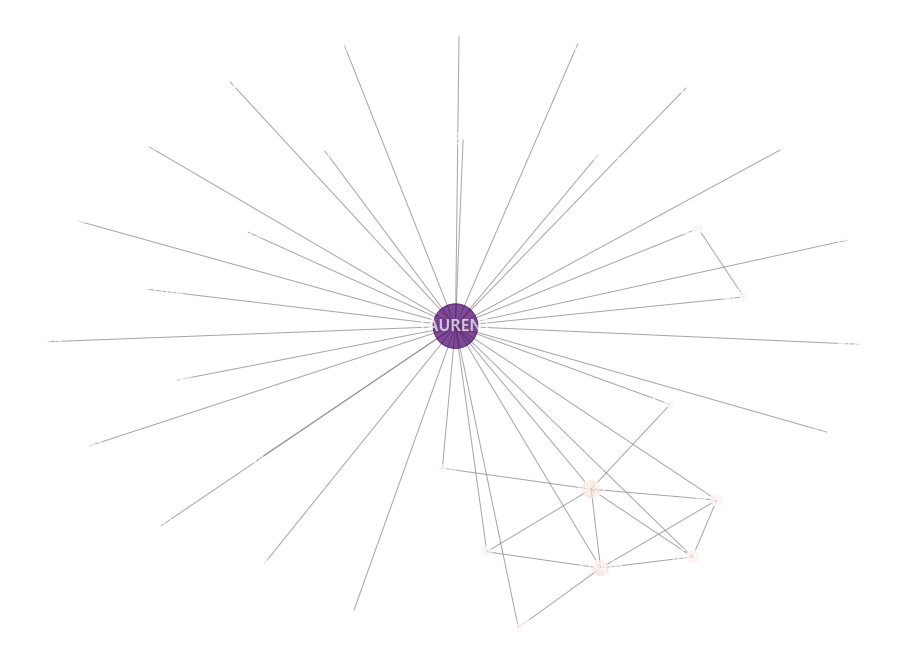

In [37]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_sl_top500_min01-w.png', bbox_inches = 'tight', transparent = True)
plt.show()


In [64]:
['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']

['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']